In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

In [7]:
file_path = '/content/drive/MyDrive/US_Accidents.csv'

In [8]:
us_accident_df = pd.read_csv(file_path)

In [10]:
print(us_accident_df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

## 1. How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?


In [12]:
for col in ['City', 'State', 'Weather_Condition']:
    print(f"Column: {col}")
    print("Unique values:", us_accident_df[col].nunique())
    print("Most frequent:", us_accident_df[col].mode()[0])
    print("Frequency count:", us_accident_df[col].value_counts().iloc[0])
    print("\n")


Column: City
Unique values: 13678
Most frequent: Miami
Frequency count: 186917


Column: State
Unique values: 49
Most frequent: CA
Frequency count: 1741433


Column: Weather_Condition
Unique values: 144
Most frequent: Fair
Frequency count: 2560802




## 2.Calculate the percentage of missing values in each column and list columns with more than 5% missing data.


In [14]:
missing_percent = (us_accident_df.isnull().sum() / len(us_accident_df)) * 100
missing_more_than_5 = missing_percent[missing_percent > 5]
print(missing_more_than_5)

End_Lat              44.029355
End_Lng              44.029355
Wind_Chill(F)        25.865904
Wind_Speed(mph)       7.391355
Precipitation(in)    28.512858
dtype: float64


##3.Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.


In [24]:
us_accident_df['Start_Time'] = pd.to_datetime(us_accident_df['Start_Time'], errors='coerce')
us_accident_df['End_Time']   = pd.to_datetime(us_accident_df['End_Time'], errors='coerce')
print("Earliest accident:", us_accident_df['Start_Time'].min())
print("\n")
print("Latest accident:", us_accident_df['Start_Time'].max())


Earliest accident: 2016-01-14 20:18:33


Latest accident: 2023-03-31 23:30:00


##4.Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?


In [17]:
duplicates = us_accident_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# handling duplicates:
us_accident_df = us_accident_df.drop_duplicates()



Number of duplicate rows: 0


##5.Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.


In [19]:
# Severity percentages
severity_dist = us_accident_df['Severity'].value_counts(normalize=True) * 100
print(severity_dist)

Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: proportion, dtype: float64


<Axes: title={'center': 'Accident Severity Distribution'}, ylabel='proportion'>

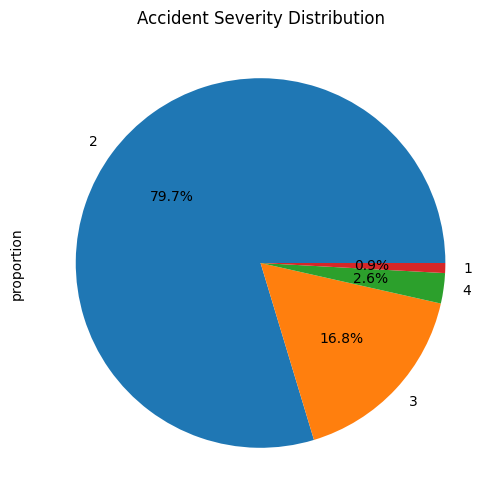

In [20]:
# Pie chart
severity_dist.plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Accident Severity Distribution")